In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [52]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [53]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [54]:
df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']]=df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']].replace(0,np.nan)

In [55]:
df.isna().sum()

animal name     0
hair           58
feathers       81
eggs           42
milk           60
airborne       77
aquatic        65
predator       45
toothed        40
backbone       18
breathes       21
venomous       93
fins           84
legs           23
tail           26
domestic       88
catsize        57
type            0
dtype: int64

In [56]:
si=SimpleImputer()


In [57]:
df.loc[:,'hair':'catsize']=si.fit_transform(df.loc[:,'hair':'catsize'])

In [58]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animal name  101 non-null    object 
 1   hair         101 non-null    float64
 2   feathers     101 non-null    float64
 3   eggs         101 non-null    float64
 4   milk         101 non-null    float64
 5   airborne     101 non-null    float64
 6   aquatic      101 non-null    float64
 7   predator     101 non-null    float64
 8   toothed      101 non-null    float64
 9   backbone     101 non-null    float64
 10  breathes     101 non-null    float64
 11  venomous     101 non-null    float64
 12  fins         101 non-null    float64
 13  legs         101 non-null    float64
 14  tail         101 non-null    float64
 15  domestic     101 non-null    float64
 16  catsize      101 non-null    float64
 17  type         101 non-null    int64  
dtypes: float64(16), int64(1), object(1)
memory usage: 

In [60]:
x=df.loc[:,'hair':'catsize']
y=df['type']
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.679487,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.000000,1.0,1.0,1.0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.679487,1.0,1.0,1.0


In [61]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [66]:
trainsc=[]
testsc=[]

for i in range(1,30):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    ypred=kn.predict(xtest)
    trainsc.append(kn.score(xtrain,ytrain))
    testsc.append(kn.score(xtest,ytest))

In [67]:
trainsc

[0.625,
 0.625,
 0.625,
 0.5875,
 0.5875,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125,
 0.6125]

In [69]:
testsc

[0.5238095238095238,
 0.5238095238095238,
 0.5238095238095238,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

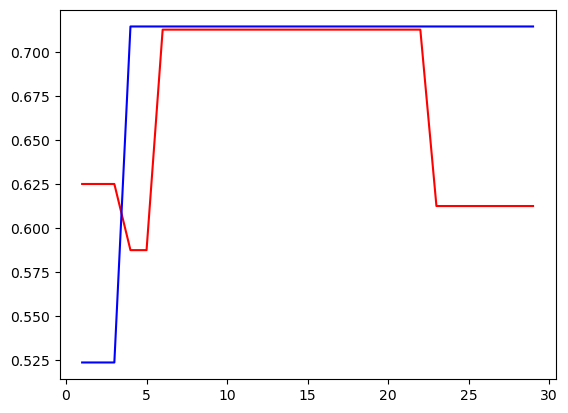

In [70]:
plt.plot(range(1,30),trainsc,color='red')
plt.plot(range(1,30),testsc,color='blue')

In [71]:
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
print(kn.score(xtrain,ytrain))
print(kn.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.625
0.5238095238095238
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2

    accuracy                           0.52        21
   macro avg       0.12      0.27      0.16        21
weighted avg       0.34      0.52      0.41        21

